# Praktikum 5
Klasifikasi Citra Siang dan Malam

# Langkah 0 - Import Library

In [1]:
# Import Required Libraries
from pathlib import Path # import Path from pathlib
import matplotlib.image as mpimg # import matplotlib.image as mpimg
import matplotlib.pyplot as plt # import matplotlib.pyplot as plt
# import cv2
from PIL import Image   # import Image from PIL
import random   # import random
import numpy as np  # import numpy as np
import pandas as pd # import pandas as pd

ModuleNotFoundError: No module named 'matplotlib'

Ketika program tersebut dijalankan, pertama-tama program mengimpor beberapa pustaka Python yang diperlukan untuk pemrosesan gambar dan data, termasuk `pathlib`, `matplotlib`, `PIL`, `numpy`, dan `pandas`. Pustaka ini digunakan untuk manipulasi file, pemrosesan gambar, serta operasi numerik dan data. Meskipun `cv2` diimpor tetapi tidak digunakan, ini mungkin karena kode yang terkait dengan OpenCV telah dihapus atau di-comment out. Program ini tampaknya mempersiapkan lingkungan kerja untuk analisis gambar dan data, tetapi tidak melakukan tindakan spesifik pada saat ini karena tidak ada kode eksekusi lebih lanjut yang ditampilkan.

In [99]:
# Image directories
train_dir = "dataset/images/training/"  # Melakukan inisialisasi variabel train_dir dengan nilai "images/training/"
test_dir = "dataset/images/test"       # Melakukan inisialisasi variabel test_dir dengan nilai "images/test/"

Pada bagian kode ini, dua variabel `train_dir` dan `test_dir` diinisialisasi dengan nilai string yang menunjukkan lokasi direktori untuk gambar pelatihan dan pengujian. `train_dir` diatur ke `"images/training/"`, dan `test_dir` diatur ke `"images/test/"`. Ini berarti bahwa gambar yang akan digunakan untuk pelatihan dan pengujian akan diambil dari folder-folder yang ditunjuk oleh variabel tersebut.

# Langkah 1 - Load Data dan Visualisasikan

In [100]:
#  Buatlah fungsi untuk membuat daftar seluruh path dari gambar.
def load_dataset(img_dir): # Membuat fungsi load_dataset dengan parameter img_dir
    p = Path(img_dir)   # Melakukan inisialisasi variabel p dengan nilai Path(img_dir)
    dirs = p.glob('*')  # Melakukan inisialisasi variabel dirs dengan nilai p.glob('*')

    img_list = []   # Melakukan inisialisasi variabel img_list dengan nilai []

    for dir in dirs:    # Melakukan perulangan untuk setiap dir pada dirs
        label = str(dir).split('/')[-1] # Melakukan inisialisasi variabel label dengan nilai str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):  # Melakukan perulangan untuk setiap file pada dir.glob('*.jpg')
            img = mpimg.imread(file)    # Melakukan inisialisasi variabel img dengan nilai mpimg.imread(file)

            if not img is None: # Jika img tidak None
                img_list.append((img, label))   # Menambahkan (img, label) ke img_list
    
    return img_list # Mengembalikan nilai img_list


Fungsi load_dataset membaca semua gambar .jpg dari subdirektori dalam direktori yang diberikan (img_dir). Untuk setiap subdirektori, fungsi ini mendapatkan label dari nama subdirektori, membaca gambar, dan menambahkannya ke daftar img_list bersama labelnya. Daftar ini kemudian dikembalikan sebagai hasil fungsi.

In [101]:
# Load gambar training
# Load training data
train_img = load_dataset(train_dir) # Melakukan inisialisasi variabel train_img dengan nilai load_dataset(train_dir)

Ketika program tersebut dijalankan, fungsi `load_dataset(train_dir)` memuat dataset gambar dari direktori yang ditentukan oleh `train_dir` dan menyimpannya dalam variabel `train_img`. Gambar-gambar ini kemudian siap digunakan untuk proses training model.

In [102]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0] # Menampilkan data pertama dari train_img

(array([[[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [176, 209, 228],
         [177, 210, 229],
         [177, 210, 229]],
 
        [[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [180, 213, 232],
         [180, 213, 232],
         [180, 213, 232]],
 
        [[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [177, 210, 229],
         [177, 210, 229],
         [177, 210, 229]],
 
        ...,
 
        [[ 35,  40,  43],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 65,  73,  75],
         [ 65,  73,  75],
         [ 65,  73,  75]],
 
        [[ 36,  41,  44],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 68,  76,  78],
         [ 68,  76,  78],
         [ 65,  73,  75]],
 
        [[ 37,  41,  44],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 68,  76,  78],
  

Ketika `train_img[0]` dijalankan, program akan menampilkan data pertama dari dataset `train_img`. Data ini seharusnya berupa tuple yang berisi array gambar (data numerik dari gambar) dan label gambar (kelas atau kategori gambar tersebut). Ini memungkinkan pengecekan apakah data telah dimuat dengan benar.

In [103]:
# Random size checking
pick_random = np.random.randint(0, len(train_img)) # Melakukan inisialisasi variabel pick_random dengan nilai np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')   # Menampilkan 'Image {pick_random}'
print(train_img[pick_random][0].shape)  # Menampilkan train_img[pick_random][0].shape

Image 81
(471, 640, 3)


Kode tersebut memilih gambar secara acak dari dataset `train_img` menggunakan `pick_random` dan menampilkan nomor gambar serta ukurannya (dimensinya) dengan `train_img[pick_random][0].shape`. Ini bertujuan untuk memeriksa ukuran gambar acak dalam dataset.

In [104]:
# Function to Visualize
def random_img_viz(img_list):  # Membuat fungsi random_img_viz dengan parameter img_list
    rand_num = np.random.randint(0, len(img_list)) # Melakukan inisialisasi variabel rand_num dengan nilai np.random.randint(0, len(img_list))

    img = img_list[rand_num][0] # Melakukan inisialisasi variabel img dengan nilai img_list[rand_num][0]
    label = img_list[rand_num][1]  # Melakukan inisialisasi variabel label dengan nilai img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'    # Melakukan inisialisasi variabel label_str dengan nilai 'day' jika label sama dengan 1, jika tidak maka 'night'

    plt.imshow(img) # Menampilkan gambar img
    print(f'Shape\t: {img.shape}') # Menampilkan 'Shape\t: {img.shape}'
    print(f'Label\t: {label}') # Menampilkan 'Label\t: {label}'

Fungsi `random_img_viz` menampilkan gambar acak dari `img_list`, bersama dengan ukuran gambar (`img.shape`) dan labelnya (ditampilkan sebagai 'day' atau 'night' berdasarkan nilainya). Gambar divisualisasikan menggunakan `plt.imshow()`.

Shape	: (737, 1024, 3)
Label	: dataset\images\training\day


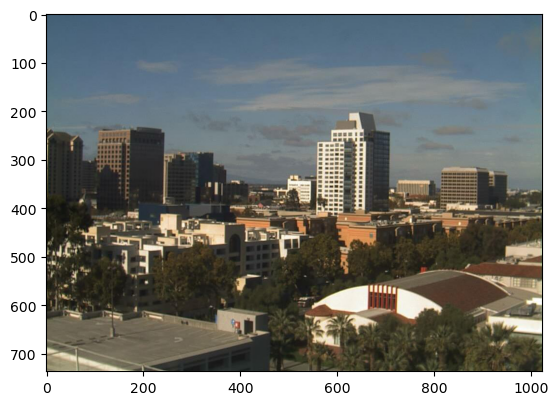

In [105]:
# Lakukan visualisasi gambar secara acak
random_img_viz(train_img)  # Memanggil fungsi random_img_viz dengan parameter train_img

Ketika kode `random_img_viz(train_img)` dijalankan, program akan memilih gambar acak dari dataset `train_img`, menampilkan gambar tersebut menggunakan `plt.imshow()`, serta mencetak ukuran gambar dan labelnya (sebagai 'day' atau 'night'). Ini membantu untuk memvisualisasikan dan memverifikasi data secara langsung.

# Langkah 3 - Pra Pengolahan Data

Pada tahap ini, kita akan melakukan dua proses utama, yaitu standardisasi ukuran gambar, dan encoding label gambar.

Bualah fungsi berikut untuk menstandarkan ukuran gambar

In [106]:
import numpy as np  # import numpy as np

def standarized_input(image):   # Membuat fungsi standarized_input dengan parameter image
    # Convert image to NumPy array if not already
    img_array = np.array(image) # Melakukan inisialisasi variabel img_array dengan nilai np.array(image)
    
    # Resize using slicing
    std_img = img_array[:600, :1100]  # Mengambil potongan gambar

    return std_img  # Mengembalikan nilai std_img


Selanjutnya, buatlah fungsi untuk kebutuhan encoding label

In [107]:
def label_encoder(label):   # Membuat fungsi label_encoder dengan parameter label
    # Encode the label
    # day as 1; night as 0
    num_val = 0 # Melakukan inisialisasi variabel num_val dengan nilai 0

    if(label == 'day'): # Jika label sama dengan 'day'
        num_val = 1 # Melakukan inisialisasi variabel num_val dengan nilai 1
    
    return num_val  # Mengembalikan nilai num_val

Terakhir, buatlah fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.

In [108]:
def preprocess(img_list):   # Membuat fungsi preprocess dengan parameter img_list
    std_img_list = []   # Melakukan inisialisasi variabel std_img_list dengan nilai []

    for item in img_list:   # Melakukan perulangan untuk setiap item pada img_list
        image = item[0] # Melakukan inisialisasi variabel image dengan nilai item[0]
        label = item[1] # Melakukan inisialisasi variabel label dengan nilai item[1]

        # Standarized the image
        std_img = standarized_input(image)  # Melakukan inisialisasi variabel std_img dengan nilai standarized_input(image)

        # Create the label
        img_label = label_encoder(label)    # Melakukan inisialisasi variabel img_label dengan nilai label_encoder(label)

        std_img_list.append((std_img, img_label))   # Menambahkan (std_img, img_label) ke std_img_list
    
    return std_img_list   # Mengembalikan nilai std_img_list

Lakukan pra pengolahan data pada data training.

In [109]:
train_std_img_list = preprocess(train_img) # Melakukan inisialisasi variabel train_std_img_list dengan nilai preprocess(train_img)

Lakukan pengecekan ukuran gambar secara acak

In [110]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list)) # Melakukan inisialisasi variabel pick_random dengan nilai np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')   # Menampilkan 'Image {pick_random}'
print(train_std_img_list[pick_random][0].shape) # Menampilkan train_std_img_list[pick_random][0].shape

Image 53
(600, 1100, 3)


WARNING! Perhatikan ukuran (shape) dari data image. Atribut shape akan menampilkan dalam konteks baris (height) x kolom (width)

Lakukan inspeksi visual dengan fungsi random_img_viz yang telah dibuat sebelumnya pada gambar hasil pra pengolahan.

Shape	: (458, 800, 3)
Label	: 0


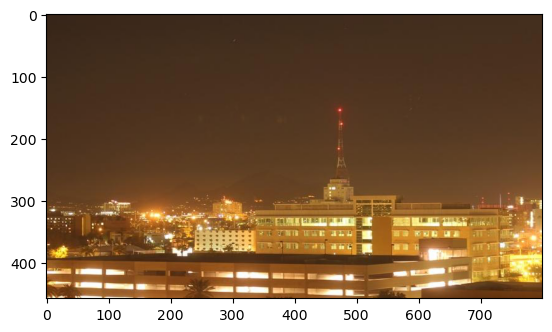

In [111]:
random_img_viz(train_std_img_list)  # Memanggil fungsi random_img_viz dengan parameter train_std_img_list

Ketika `random_img_viz(train_std_img_list)` dijalankan, fungsi `random_img_viz` akan memilih gambar secara acak dari daftar `train_std_img_list`. Gambar tersebut kemudian akan divisualisasikan menggunakan `plt.imshow()`, dan informasi mengenai ukuran gambar serta labelnya akan dicetak. Ini memungkinkan pengguna untuk melihat contoh gambar yang telah distandarisasi dan memverifikasi data.

# Langkah 4 - Ekstraksi Fitur

Buatlah fungsi berikut untuk mendapatkan nilai rata-rata tingkat kecerahan

In [112]:
import numpy as np  # import numpy as np

def avg_brightness(image): # Membuat fungsi avg_brightness dengan parameter image
    # Convert image to HSV using NumPy
    img_hsv = np.zeros_like(image)  # Placeholder for HSV image

    # Convert RGB to HSV manually
    r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]    # Split the channels
    max_c = np.max(image, axis=2)   # Get the max channel
    min_c = np.min(image, axis=2)   # Get the min channel
    delta = max_c - min_c

    # Calculate V channel
    img_hsv[:, :, 2] = max_c    # Take the max channel

    # Calculate H and S channels
    img_hsv[:, :, 0] = np.where(delta == 0, 0,  # If delta is 0, H is 0
                                  np.where(max_c == r, (60 * (g - b) / delta) % 360,    # If max is r, H is 60 * (g - b) / delta
                                  np.where(max_c == g, (60 * (b - r) / delta) + 120,    # If max is g, H is 60 * (b - r) / delta + 120
                                  (60 * (r - g) / delta) + 240)))   # If max is b, H is 60 * (r - g) / delta + 240

    img_hsv[:, :, 1] = np.where(max_c == 0, 0, delta / max_c)   # Calculate S channel

    # Calculate the avg of brightness (V channel)
    sum_brightness = np.sum(img_hsv[:, :, 2])  # Take the V channel
    area = image.shape[0] * image.shape[1]  # Calculate the area
    avg = sum_brightness / area # Calculate the avg

    return avg  # Mengembalikan nilai avg


Lakukan pengecekan pada gambar secara acak. INGAT! Gunakan gambar yang telah melalui proses pra pengolahan data!

Image 193
Avg Brightness: 101.7095


C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:18: RuntimeWarning: invalid value encountered in divide
  np.where(max_c == r, (60 * (g - b) / delta) % 360,    # If max is r, H is 60 * (g - b) / delta
C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:19: RuntimeWarning: invalid value encountered in divide
  np.where(max_c == g, (60 * (b - r) / delta) + 120,    # If max is g, H is 60 * (b - r) / delta + 120
C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:20: RuntimeWarning: invalid value encountered in divide
  (60 * (r - g) / delta) + 240)))   # If max is b, H is 60 * (r - g) / delta + 240


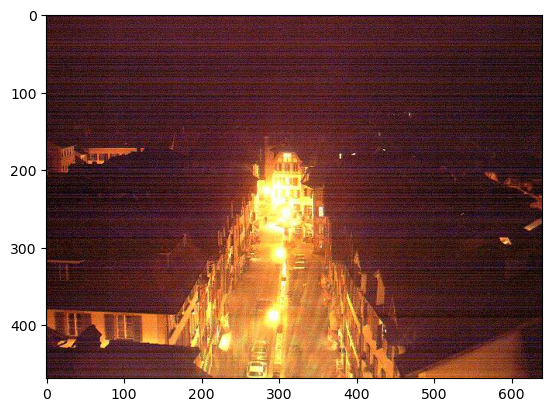

In [113]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))    # Melakukan inisialisasi variabel rand_img dengan nilai np.random.randint(0, len(train_std_img_list))

# Mengambil gambar dan label dari daftar
feature_img = train_std_img_list[rand_img][0]   # Melakukan inisialisasi variabel feature_img dengan nilai train_std_img_list[rand_img][0]

# Menghitung rata-rata kecerahan
avg_img = avg_brightness(feature_img)   # Melakukan inisialisasi variabel avg_img dengan nilai avg_brightness(feature_img)

# Menampilkan informasi gambar
print(f'Image {rand_img}')  # Menampilkan 'Image {rand_img}'
print(f'Avg Brightness: {avg_img:.4f}')   # Menampilkan 'Avg Brightness: {avg_img:.4f}'

plt.imshow(feature_img.astype(np.uint8))  # Pastikan gambar dalam format yang benar untuk ditampilkan
plt.axis('on')  # Menampilkan sumbu

# Mengatur skala sumbu
plt.xticks(ticks=np.arange(0, feature_img.shape[1], step=100))  # Menampilkan sumbu x
plt.yticks(ticks=np.arange(0, feature_img.shape[0], step=100))  # Menampilkan sumbu y

plt.show()  # Menampilkan gambar


Ketika program dijalankan, sebuah gambar acak dipilih dari `train_std_img_list`, dan rata-rata kecerahan gambar dihitung. Informasi tentang nomor gambar dan kecerahan ditampilkan, lalu gambar tersebut divisualisasikan dengan sumbu x dan y yang diatur untuk skala 100 piksel. Ini memungkinkan pengguna untuk melihat contoh gambar dan memahami kecerahannya.

# Langkah 5 - Klasifikasi dengan Metode Threshold

Pada tahap ini, kita akan melakukan proses klasifikasi sederhana dengan menggunakan nilai ambang batas (threshold) dari nilai rata-rata kecerahan yang kita tentukan sendiri.

Buatlah fungsi berikut,

In [114]:
def predict_label(img, threshold):  # Membuat fungsi predict_label dengan parameter img dan threshold
    # Computer average brightness
    avg = avg_brightness(img)   # Melakukan inisialisasi variabel avg dengan nilai avg_brightness(img)
    pred = 0    # Melakukan inisialisasi variabel pred dengan nilai 0

    # Predict the label based on user defined threshold
    if avg > threshold: # Jika avg lebih besar dari threshold
        pred = 1    # Melakukan inisialisasi variabel pred dengan nilai 1
    
    return pred   # Mengembalikan nilai pred

Lakukan pengecekan prediksi secara acak pada data training

Image 112
Actual label: 0
Predicted label: 1


C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:18: RuntimeWarning: invalid value encountered in divide
  np.where(max_c == r, (60 * (g - b) / delta) % 360,    # If max is r, H is 60 * (g - b) / delta
C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:19: RuntimeWarning: invalid value encountered in divide
  np.where(max_c == g, (60 * (b - r) / delta) + 120,    # If max is g, H is 60 * (b - r) / delta + 120
C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:20: RuntimeWarning: invalid value encountered in divide
  (60 * (r - g) / delta) + 240)))   # If max is b, H is 60 * (r - g) / delta + 240


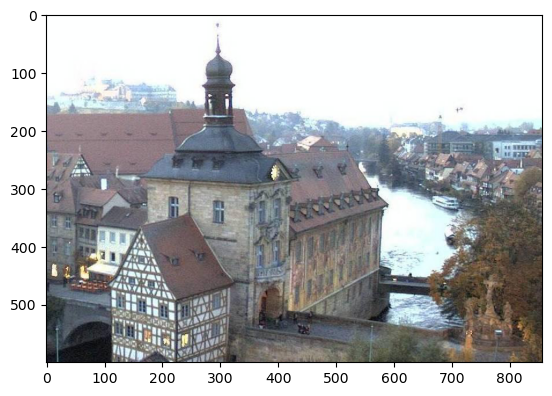

In [115]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))    # Melakukan inisialisasi variabel rand_img dengan nilai np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)    # Melakukan inisialisasi variabel pred dengan nilai predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')  # Menampilkan 'Image {rand_img}'
print(f'Actual label: {train_std_img_list[rand_img][1]}')   # Menampilkan 'Actual label: {train_std_img_list[rand_img][1]}'
print(f'Predicted label: {pred}')   # Menampilkan 'Predicted label: {pred}'
plt.imshow(train_std_img_list[rand_img][0])   # Menampilkan gambar train_std_img_list[rand_img][0]

Ketika program dijalankan, sebuah gambar acak dipilih dari `train_std_img_list`, dan labelnya diprediksi menggunakan fungsi `predict_label` dengan ambang batas 120. Hasilnya, nomor gambar, label sebenarnya, dan label yang diprediksi ditampilkan. Gambar yang diuji juga divisualisasikan menggunakan `plt.imshow()`, memungkinkan pengguna untuk melihat dan mengevaluasi prediksi model.

# Langkah 6 - Evaluasi (Manual)

Selanjutnya kita akan membuat fungsi evaluasi model sederhana, yaitu dengan membandingkan label yang diprediksi benar dengan seluruh data. Ingat kembali konsep confussion matrix.

Buatlah fungsi berikut,

In [116]:
def evaluate(img_list, threshold):  # Membuat fungsi evaluate dengan parameter img_list dan threshold
    miss_labels = []    # Melakukan inisialisasi variabel miss_labels dengan nilai []

    for file in img_list:   # Melakukan perulangan untuk setiap file pada img_list
        # Get the ground truth / correct label
        img = file[0]   # Melakukan inisialisasi variabel img dengan nilai file[0]
        label = file[1] # Melakukan inisialisasi variabel label dengan nilai file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)  # Melakukan inisialisasi variabel pred_label dengan nilai predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label: # Jika pred_label tidak sama dengan label
            miss_labels.append((img, pred_label, label))    # Menambahkan (img, pred_label, label) ke miss_labels
    
    total_img = len(img_list)   # Melakukan inisialisasi variabel total_img dengan nilai len(img_list)
    corr_pred = total_img - len(miss_labels)    # Melakukan inisialisasi variabel corr_pred dengan nilai total_img - len(miss_labels)
    accuracy = corr_pred / total_img    # Melakukan inisialisasi variabel accuracy dengan nilai corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')  # Menampilkan 'Accuracy: {accuracy:.4f}'

Lakukan evaluasi pada data training dengan nilai ambang batas 120

In [117]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)   # Memanggil fungsi evaluate dengan parameter train_std_img_list dan threshold=120

C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:18: RuntimeWarning: invalid value encountered in divide
  np.where(max_c == r, (60 * (g - b) / delta) % 360,    # If max is r, H is 60 * (g - b) / delta
C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:19: RuntimeWarning: invalid value encountered in divide
  np.where(max_c == g, (60 * (b - r) / delta) + 120,    # If max is g, H is 60 * (b - r) / delta + 120
C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:20: RuntimeWarning: invalid value encountered in divide
  (60 * (r - g) / delta) + 240)))   # If max is b, H is 60 * (r - g) / delta + 240
C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:22: RuntimeWarning: invalid value encountered in divide
  img_hsv[:, :, 1] = np.where(max_c == 0, 0, delta / max_c)   # Calculate S channel


Accuracy: 0.6500


Anda dapat mengubah nilai ambang batas dan amati hasilnya.

Selanjutnya, kita akan melakukan evaluasi pada data testing. Namun sebelumnya, data testing harus diperlakukan sama dengan data training dalam konteks pra progolahan data dan ekstraksi fitur.

In [118]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)   # Melakukan inisialisasi variabel test_img dengan nilai load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)    # Melakukan inisialisasi variabel test_std_img_list dengan nilai preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)  # Memanggil fungsi evaluate dengan parameter test_std_img_list dan threshold=120

C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:18: RuntimeWarning: invalid value encountered in divide
  np.where(max_c == r, (60 * (g - b) / delta) % 360,    # If max is r, H is 60 * (g - b) / delta
C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:19: RuntimeWarning: invalid value encountered in divide
  np.where(max_c == g, (60 * (b - r) / delta) + 120,    # If max is g, H is 60 * (b - r) / delta + 120
C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:20: RuntimeWarning: invalid value encountered in divide
  (60 * (r - g) / delta) + 240)))   # If max is b, H is 60 * (r - g) / delta + 240
C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:22: RuntimeWarning: invalid value encountered in divide
  img_hsv[:, :, 1] = np.where(max_c == 0, 0, delta / max_c)   # Calculate S channel


Accuracy: 0.6062


# Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM

Pada proses klasifikasi sebelumnya, kita hanya membedakan kelas day dan night dengan nilai ambang batas. Cara tersebut memang mudah untuk digunakan, akan tetapi belum tentu secara baik dan general dapat memedakan kedua data. Oleh karena itu, pada bagian ini, kita akan mencoba menggunakan pendekatan lain untuk melakukan proses klasifikasi. Kita akan kembali mulai pada langkah 4

# Langkah 4 alternatif - Membuat Feature Vectors
Perbedaan mendasar dari langkah 4 sebelumnya adalah, kita akan melakukan tabulasi semua nilai rata-rata kecerahan pada data, dan menyimpannya dalam bentuk tabel. Dalam konteks ini, kita akan membuat tabel dengan kolom fitur dan label.

Buatlah fungsi berikut,

In [120]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):   # Membuat fungsi extract_avg_bright_feature dengan parameter img_list
    avg_list = []   # Melakukan inisialisasi variabel avg_list dengan nilai []
    labels = [] # Melakukan inisialisasi variabel labels dengan nilai []

    for img in img_list:    # Melakukan perulangan untuk setiap img pada img_list
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)    # Menambahkan img_avg ke avg_list
        labels.append(img_label)    # Menambahkan img_label ke labels
    
    # Stack data in columcular way  
    data = np.column_stack((avg_list, labels))  # Melakukan inisialisasi variabel data dengan nilai np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])   # Melakukan inisialisasi variabel df dengan nilai pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df   # Mengembalikan nilai df

Cek hasilnya pada data training,

In [121]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)  # Melakukan inisialisasi variabel train_avg_img dengan nilai extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')  # Menampilkan 'Shape: {train_avg_img.shape}'
train_avg_img.head()    # Menampilkan 5 data pertama dari train_avg_img

C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:18: RuntimeWarning: invalid value encountered in divide
  np.where(max_c == r, (60 * (g - b) / delta) % 360,    # If max is r, H is 60 * (g - b) / delta
C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:19: RuntimeWarning: invalid value encountered in divide
  np.where(max_c == g, (60 * (b - r) / delta) + 120,    # If max is g, H is 60 * (b - r) / delta + 120
C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:20: RuntimeWarning: invalid value encountered in divide
  (60 * (r - g) / delta) + 240)))   # If max is b, H is 60 * (r - g) / delta + 240
C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:22: RuntimeWarning: invalid value encountered in divide
  img_hsv[:, :, 1] = np.where(max_c == 0, 0, delta / max_c)   # Calculate S channel


Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,175.209738,0.0
1,193.036138,0.0
2,152.384834,0.0
3,199.861515,0.0
4,116.181346,0.0


Lakukan langkah yang serupa pada data testing

In [122]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)    # Melakukan inisialisasi variabel test_avg_img dengan nilai extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')   # Menampilkan 'Shape: {test_avg_img.shape}'
test_avg_img.head() # Menampilkan 5 data pertama dari test_avg_img

C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:18: RuntimeWarning: invalid value encountered in divide
  np.where(max_c == r, (60 * (g - b) / delta) % 360,    # If max is r, H is 60 * (g - b) / delta
C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:19: RuntimeWarning: invalid value encountered in divide
  np.where(max_c == g, (60 * (b - r) / delta) + 120,    # If max is g, H is 60 * (b - r) / delta + 120
C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:20: RuntimeWarning: invalid value encountered in divide
  (60 * (r - g) / delta) + 240)))   # If max is b, H is 60 * (r - g) / delta + 240
C:\Users\tirta\AppData\Local\Temp\ipykernel_6380\1928029926.py:22: RuntimeWarning: invalid value encountered in divide
  img_hsv[:, :, 1] = np.where(max_c == 0, 0, delta / max_c)   # Calculate S channel


Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,194.343690,0.0
1,177.894255,0.0
2,201.725060,0.0
3,191.353395,0.0
4,188.226984,0.0


# Langkah 5 alternatif
Selanjutnya, kita akan membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn.

In [123]:
print(y_train.value_counts())

LABELS
0.0    240
Name: count, dtype: int64


In [131]:
# import requied library
from sklearn.svm import SVC   # import SVC from sklearn.svm

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)  # Melakukan inisialisasi variabel X_train dengan nilai train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]   # Melakukan inisialisasi variabel y_train dengan nilai train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)    # Melakukan inisialisasi variabel X_test dengan nilai test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]     # Melakukan inisialisasi variabel y_test dengan nilai test_avg_img.iloc[:,1]

model = SVC()   # Melakukan inisialisasi variabel model dengan nilai SVC()
model.fit(X_train, y_train) # Melakukan training model

# Perbaiki kode program tersebut
# Predict
y_pred = model.predict(X_test)  # Melakukan prediksi

ValueError: The number of classes has to be greater than one; got 1 class

# Langkah 6 alternatif
Selanjutnya, kita akan melakukan evaluasi pada data training dan testing dengan bantuan library scikit-learn.

In [134]:
from sklearn.metrics import accuracy_score

# Train the model on training data
model.fit(X_train, y_train)

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')


ValueError: The number of classes has to be greater than one; got 1 class